In [96]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Tasks 1-4


## Task 1: Permutations and Combinations

In the Lady Tasting Tea experiment, we have twelve cups of tea: six with milk poured first and six with tea poured first. A person claims they can distinguish the order by taste. To test this, we ask them to identify which six cups had milk poured first.<br>
### 1.1. Calculate the probability that they correctly identify all six cups by random guessing, assuming they have no special ability.

In [97]:
# Initial conditions of the experiment:

total_cups = 12
with_milk_first = 6
with_tea_first = 6


Calculating the number of ways to choose six cups with milk poured first out of twelve cups can be done using **the choose function** formula.

Where:<br>
**n** = total_cups<br>
**k** = with_milk_first<br>

**number_of_ways = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))**<br>

https://www.w3schools.com/python/ref_math_comb.asp

In [98]:
# The function **math.comb** in Python is the choose function and calculates all the possible ways to choose k from n. 
# The order does not matter and the elements can't be selected twice.
total_comb = math.comb(total_cups,with_milk_first)
total_comb

924

We found that there are 924 ways to choose 6 cups out of 12. We agreed, that the order doesn't matter, so there are only 1 way to choose all the cups with milk first. A person have no special powers and selection is just gessing.
Now we can calculate the probability that they selects the six correct cups.

In [99]:
# Calculating probability:
prob = 1/total_comb

In [100]:
# The cup labels:
labels = ['a','b','c','d','e','f','g','h','i','j','k','l']
len(labels)
#labels = list(range(total_cups))


12

Ref.: https://www.geeksforgeeks.org/python-itertools-combinations-function/ <br>

**itertools.combinations()** generates all possible tuples from a given sequence or set of elements, treating each element as unique based on its position in the sequence.<br>
We use it to generate all the ways six labeled cups might be choosen. 

In [101]:
# The list combs will keep possible combinations of six cups out of our list "labels":
combs = list(itertools.combinations(labels,with_milk_first))
# Show 10 out of 924
display(f'First 10 sets out of 924 possible options {combs[0:10]}')

print(f'Number of combinations {len(combs)}')

"First 10 sets out of 924 possible options [('a', 'b', 'c', 'd', 'e', 'f'), ('a', 'b', 'c', 'd', 'e', 'g'), ('a', 'b', 'c', 'd', 'e', 'h'), ('a', 'b', 'c', 'd', 'e', 'i'), ('a', 'b', 'c', 'd', 'e', 'j'), ('a', 'b', 'c', 'd', 'e', 'k'), ('a', 'b', 'c', 'd', 'e', 'l'), ('a', 'b', 'c', 'd', 'f', 'g'), ('a', 'b', 'c', 'd', 'f', 'h'), ('a', 'b', 'c', 'd', 'f', 'i')]"

Number of combinations 924


In [102]:
# Now we choose six random cups to put milk in first:
labels_with_milk = random.sample(labels,6)
labels_with_milk

['j', 'd', 'h', 'l', 'b', 'a']

List contain elements in a particular order, but we agreed that the order doesn't matter. We turn labels_with_milk into a set.

In [103]:
set_with_milk_first = set(labels_with_milk)
set_with_milk_first

{'a', 'b', 'd', 'h', 'j', 'l'}

Ref.: https://www.w3schools.com/python/ref_set_intersection.asp<br>
Now, when we know what cups are with milk first, we can check how many cups will be named correctly in each possible way to choose them. 
The **intersection()** method returns a set that contains the similarity between two or more sets.


In [104]:
# In the list we will write the number of correctly guessed cups with milk in first in each of the possible sets.
no_correct_guesses = []

for comb in combs:
    #turn comb into a set:
    s1 =set(comb)
    s2 = set_with_milk_first
    #Checking if there are any overlaps
    overlap = s1.intersection(s2)
    # we need only a number of overlaps, so we do append of len(overlap) to the no_correct_guesses
    no_correct_guesses.append(len(overlap))
    #print(comb, overlap, len(overlap))

Ref.: https://numpy.org/devdocs/reference/generated/numpy.unique.html<br>
We got the list of numbers of correctly named cups with milk in first. The maximum correct guesses in each set is six, and the minimum is zero. We want to figure out how many times all possible overlaps occurred.

In [105]:
counts = np.unique(no_correct_guesses, return_counts=True)
print(counts)

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))


We got 2 arrays. One with possible overlaps and another with it's frequency.<br>

There is **one** way to choose all the cups **with tee in first** and **one** way to choose all the cups **with milk in first.**<br>

**One** cup with milk in first might be found in **thirty six sets**, as well as **five** cups with milk in first.<br>

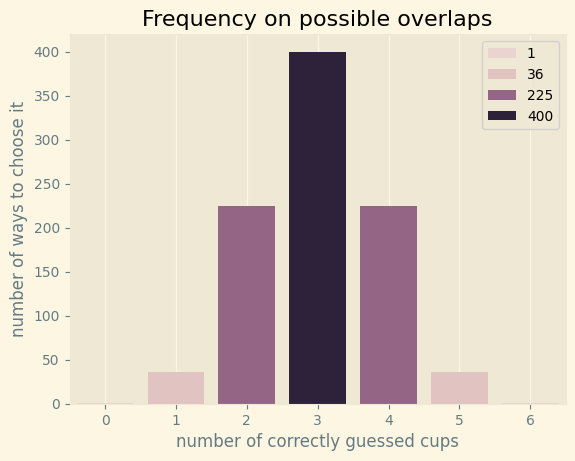

In [106]:
plt.fig = figsize=(10, 6)
sns.barplot(x=counts[0], y=counts[1], hue= counts[1])
plt.title('Frequency on possible overlaps')
plt.xlabel('number of correctly guessed cups')
plt.ylabel('number of ways to choose it')
plt.grid()
plt.show()

According to the barchart, for a person with no special power, there are more chanses to guess 3 cups with milk first. 

### 1.2. One error. Calculate the probability that they identify **at least five of the six** correct cups by random guessing.

Now I whant to determine the probability of guessing six cups with **one error**. That means that they must choose either **five** cups with milk in first out of **six**, or **6** cups with milk in first.  In this case I will calculate all the events together: 

In [107]:
#all the possible correct ways with one error and without an error:
correct_one = (36+1)
# all the possible ways to choose 6 cups
total_comb

prob_one_error = correct_one/total_comb
print(f'The probability to pick at least five cups correctly is {round(prob_one_error,3)*100}%')

The probability to pick at least five cups correctly is 4.0%


### 1.3. Are two errors acceptable?

In [108]:
# we need to sum all events with one error, with two and without an error
correct_two = (1 + 36 + 225)

# all possible ways to celect 6 cups
total_comb

prob_two_errors = correct_two/total_comb
print(f'The probability to pick at least four cups correctly is {(round(prob_two_errors,3)*100)}%')

The probability to pick at least four cups correctly is 28.4%


When designing a statistical test, we must decide on an acceptable significance level. Besides, two errors and four errors are equally likely, according to the barchart. If two errors are allowed, this increases the probability of a Type I error — where the null hypothesis is true, but we mistakenly reject it.  In this case, the null hypothesis is: "The person is selecting the cups randomly and does not have the ability to distinguish the cups with milk in first.

## Task 2: numpy's Normal Distribution
### 2.1.Generate Sample Data:
Use **numpy.random.normal()** to generate a sample of 100,000 values.
Set the mean to 10.0 and the standard deviation to 3.0.

Ref.:<br> https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html#numpy-random-normal<br>
random.normal(loc=0.0, scale=1.0, size=None)<br>
loc : Mean (“centre”) of the distribution.<br>
scale: Standard deviation (spread or “width”) of the distribution.<br>
size: Output shape.

In [109]:
#mean
mean=10.0

#standard deviation 
std=3.0

#sample size
size=5000

#Seed for repeating the results
seed = 2
np.random.seed(seed)

sample = np.random.normal(mean,std,size)
#sample[0:8]

### 2.2.Test for Normality:
Use the **scipy.stats.shapiro()** function to assess whether the generated sample is normally distributed.
Interpret and explain the results.


Ref.:<br>[Shapiro-Wilk test](https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/)<br>
[Alpha level](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/what-is-an-alpha-level/)<br>

**Shapiro-Wilk test** is a test of normality, it determines whether the given sample comes from the normal distribution or not. 

**Null hypothesis**: the random variable in the sample is normally distributed.<br>
**Alternative Hypothesis**: The random variable in the sample is not normally distributed.

In [110]:
#import libraries
from scipy.stats import shapiro


**Setting Alpha level**<br>
The significance level or alpha level is the probability of making the wrong decision when the null hypothesis is true (Type I error).

We set alpha = 0.05, which means that the probability of making a Type I error is 5%.

If **p-value < alpha**, we would reject the null hypothesis, indicating the data likely does not follow a normal distribution.

If **p-value > alpha**, we fail to reject the null hypothesis. This means we do not have enough evidence to say the sample data doesn't come from the normal distribution. 

In [111]:
alpha = 0.05

# function for performing the Shapiro-Wilk Test

def test(data_sample, sanificanse_level):
    result = shapiro(data_sample)
    
    if result[1] > alpha:
        print(
            f'We did not get enough evidence to reject The Null Hypothysis. P-Value = {round(result[1],2)}'
        )
    else:
        print(f'There is no evedense to accept The Null Hypothysis. P-Value = {round(result[1],2)}'
        )


In [112]:
#Run the function with our sample:

test(sample,alpha)

We did not get enough evidence to reject The Null Hypothysis. P-Value = 0.33


The Shapiro-Wilk test was performed, and the results indicate that our sample data is consistent with a normal distribution.


### 2.3. Visualize the Data:
Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.



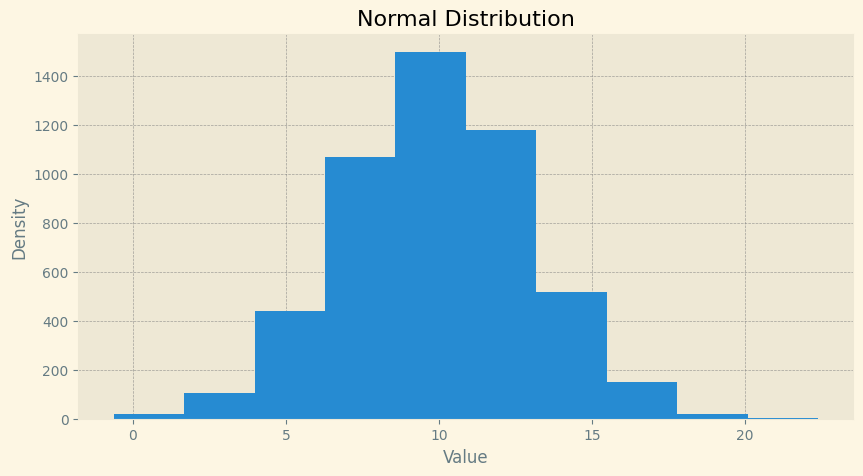

In [113]:
fig,ax = plt.subplots(figsize=(10, 5))

#creatin a histogram
ax.hist(sample)
ax.set_title("Normal Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

#show the plot
plt.show()